In [1]:
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
import pandas as pd
iris = pd.DataFrame(data.data, columns = data.feature_names)
iris['target'] = data.target
iris.head()

C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(iris.iloc[:,:-1], iris.target)

C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

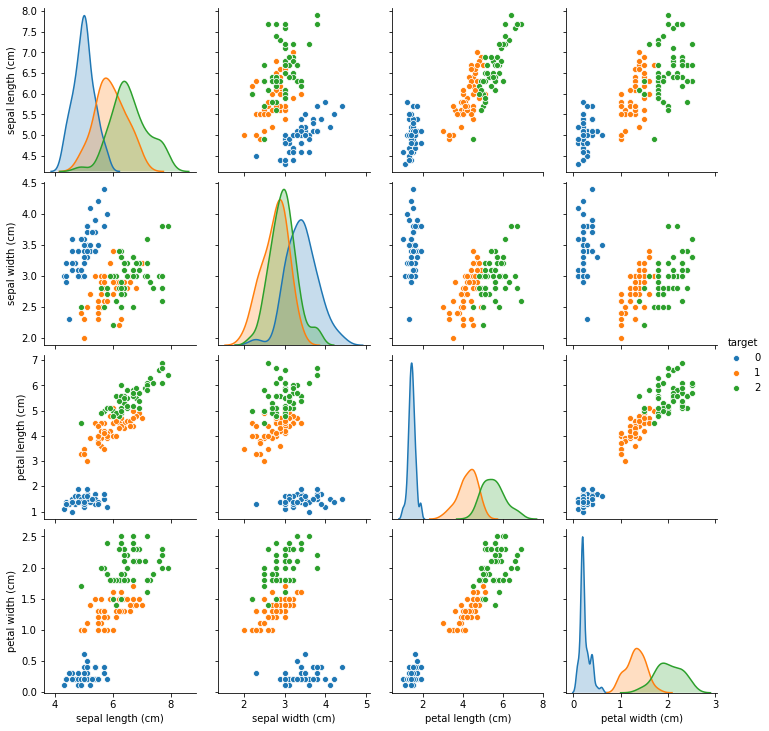

In [5]:
import seaborn as sns
sns.pairplot(iris,hue='target')

### opencv 사용하는 이유

- 이미지, 영상 처리 최적화 +  ML/DL 가능 + GPU
- c랑 c++ -> system porting이 쉬움

In [6]:
import cv2

**각 알고리즘마다 쓰는 방식이 다를 수도**
- scikit에서는 fit으로 통일되지만 opencv는 아닐 수도 있다.

### hyperparameter
- scikit : 생성할 때, set_params
- opencv : set~ 으로 넣음

In [7]:
lr = cv2.ml.LogisticRegression_create()

In [ ]:
# cv2.ml.LogisticRegression_BATCH
# cv2.ml.LogisticRegression_MINI_BATCH

In [8]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)

In [10]:
lr.setMiniBatchSize(1)
lr.setIterations(200)

In [11]:
lr.train(iris.iloc[:,:-1], cv2.ml.ROW_SAMPLE, iris.target)
# scikit에서는 된다.

TypeError: Expected Ptr<cv::UMat> for argument '%s'

sklearn에서는 onevsone, onevsrest를 내부적으로 바꿈

In [13]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
# 1vs1비교 1vsn비교

In [15]:
iris.target.map({0:0,1:1,2:1})
lr.train(iris.iloc[:,:-1].values.astype('float32'), cv2.ml.ROW_SAMPLE, iris.target.values.astype('float32'))

True

In [18]:
import numpy as np
lr.predict(np.array([[5.9,3.2,4.8,1.8]], dtype='float32'))

(1.0, array([[1]], dtype=int32))

### <span style="color:blue">가짜 데이터 만들기</span>

**scikit-learn 데이터 관련**
- load_ : data가 조금 밖에 없음
- fetch_ : data가 어느 정도 커서 인터넷에서 받아와야
- make_ : 랜덤 생성

numpy : random

In [19]:
data_point = np.random.randint(0,100,2)
data_label = np.random.randint(0,2)

In [26]:
from sklearn.datasets import make_classification
make_classification(1,10)

(array([[ 0.38066408, -1.494704  , -0.14034643, -1.06245506, -0.15901828,
          1.14575298, -1.16468202,  0.56241737, -1.81307903, -2.22578869]]),
 array([0]))

In [28]:
def make_point(n_sample, n_feature):
    label = np.random.randint(0,2, n_sample)
    return np.random.randint(0,100,(n_sample, n_feature)), label
make_point(10,3)

(array([[32, 86, 43],
        [ 9, 67, 50],
        [99, 97, 20],
        [42, 10,  1],
        [63, 29, 48],
        [41, 87, 16],
        [ 7, 55, 55],
        [34, 39, 89],
        [75, 73, 55],
        [83, 59, 66]]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1]))

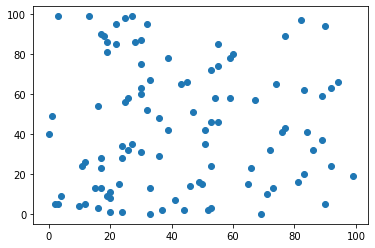

In [41]:
import matplotlib.pyplot as plt
data = make_point(100,2)
plt.scatter(data[0][:,0],data[0][:,1])

In [30]:
data[0,0] # tuple형태라 error

TypeError: tuple indices must be integers or slices, not tuple

In [32]:
1,2 # tuple임

(1, 2)

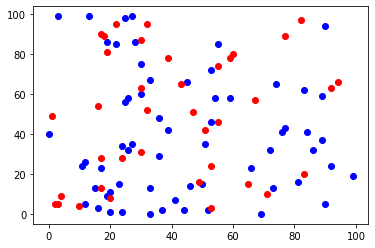

In [42]:
blue = data[0][data[1]==0]
red = data[0][data[1]==1]
plt.scatter(blue[:,0],blue[:,1], color='b')
plt.scatter(red[:,0],red[:,1], color='r')

In [124]:
knn.setAlgorithmType(10)
knn.getAlgorithmType() # 1만..?

1

In [130]:
knn = cv2.ml.KNearest_create()

In [127]:
knn.train(data[0].astype('float32'), cv2.ml.ROW_SAMPLE, data[1])

True

In [129]:
knn.predict(np.mat([55,80]).astype('float32'))

(2.0, array([[2.]], dtype=float32))

In [128]:
knn.findNearest(np.mat([55,80]).astype('float32'),3)

(2.0,
 array([[2.]], dtype=float32),
 array([[2., 2., 2.]], dtype=float32),
 array([[6930.5415, 6991.001 , 6997.87  ]], dtype=float32))

In [44]:
np.array_equal(data[0].astype('float32'),data[0])

True

In [45]:
type(np.float32)

type

In [54]:
knn.predict(np.array([[55,80]], dtype = 'float32'))

(0.0, array([[0.]], dtype=float32))

### 비지도학습 해보기

In [55]:
cv2.kmeans

<function kmeans>

In [59]:
from sklearn.datasets import make_blobs
data = make_blobs(cluster_std=1)

# cluster_std로 흩어진 정도 

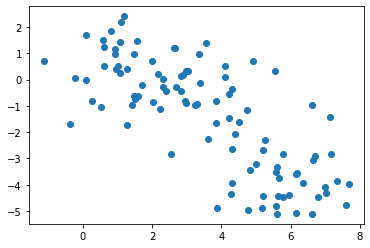

In [60]:
plt.scatter(data[0][:,0],data[0][:,1])

random data 에서 성능을 보이면 일반화된 성능보임

In [65]:
data = np.random.multivariate_normal((20,20),((12,8),(8,18)),1000)
# 다변량 정규
data.shape

(1000, 2)

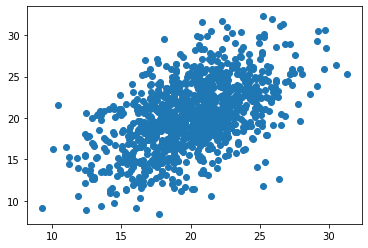

In [66]:
plt.scatter(data[:,0],data[:,1])

In [71]:
cv2.PCACompute(data, np.array([])) # 평균을 계산해서 처리해줌.
#mean, eigen_vector나옴

(array([[20.01026444, 20.29988438]]),
 array([[ 0.56658199,  0.82400537],
        [ 0.82400537, -0.56658199]]))

In [75]:
mean, eig = cv2.PCACompute(data, np.array([]))

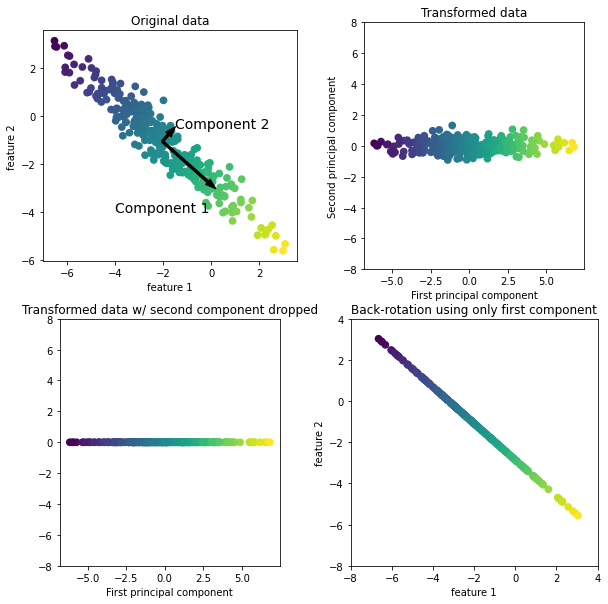

In [74]:
import mglearn
mglearn.plot_pca.plot_pca_illustration()

#### pca의 단점
- 전체값이 바뀌어버림
- 실무에서는 최후의 수단으로 씀


**call signature**
- option의 의미, []로 되어있는건 안 넣어도 된다는 의미

In [ ]:
plt.plot([1,2,3]) # y에만 들어감

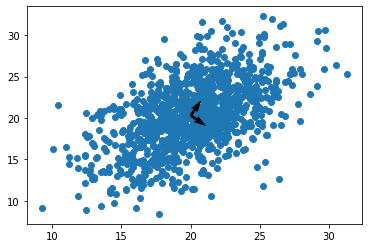

In [99]:
plt.scatter(data[:,0],data[:,1])
plt.quiver([20,20],[20,20], eig[:,0], eig[:,1], zorder=3)

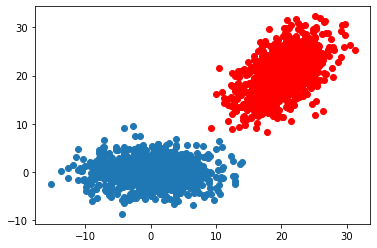

In [95]:
# 회전시키기
data1 = cv2.PCAProject(data,mean, eig)
plt.scatter(data[:,0],data[:,1],color='r')
plt.scatter(data1[:,0],data1[:,1])

In [100]:
data = make_blobs(300,2,centers=4)
# * 뒤부터 keyword only

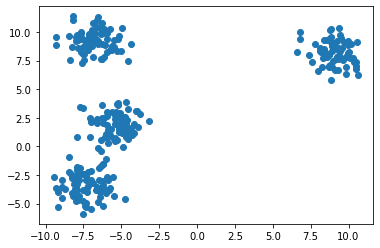

In [102]:
plt.scatter(data[0][:,0],data[0][:,1])

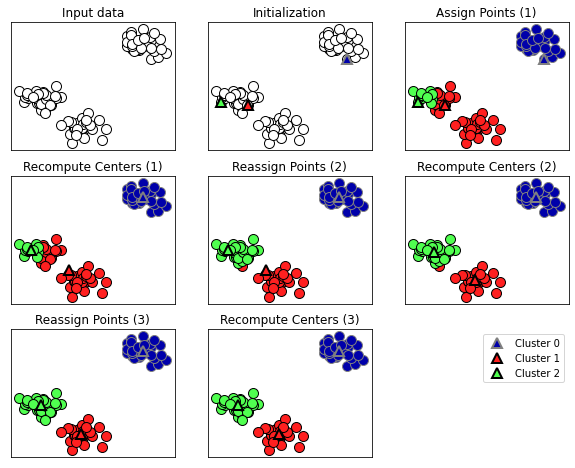

In [103]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

random값에 따라 cluster가 다르게 나온다.

In [105]:
cv2.KMEANS_RANDOM_CENTERS

0

In [108]:
cv2.TermCriteria_COUNT

1

In [115]:
x,y,z = cv2.kmeans(data[0].astype('float32'),4, None, (cv2.TermCriteria_EPS ,30,0.1),100,cv2.KMEANS_RANDOM_CENTERS)

criteria..? 찾아보기

In [116]:
x #중점에서 거리 root값

590.1188077628613

In [117]:
z # 4개의 중점들

array([[-5.410086 ,  1.8873985],
       [-7.34725  , -3.3877394],
       [-6.779135 ,  9.200404 ],
       [ 9.047689 ,  8.1809225]], dtype=float32)

In [ ]:
y # labeling

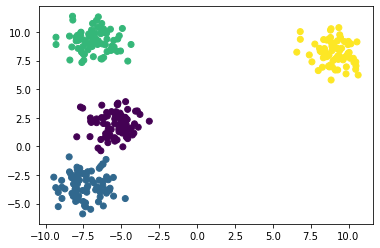

In [122]:
plt.scatter(data[0][:,0],data[0][:,1],c=y)